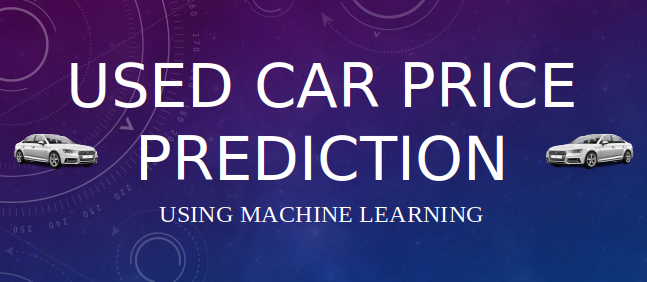

Submission by: Halit Vural - C9807 <br>
Submission date: Jan 18, 2022

# Problem definition

For this project we are using a car dataset, where we want to <u>predict the selling price</u> of car based on its certain features.
Since we need to find the real value, with real calculation, therefore this problem is regression problem. 
We will be using linear regression to solve this problem.

General equation of Multiple Linear Regression:
$$y = \beta_0 + \beta_{1}x_1 + \beta_{2}x_2 + \beta_{3}x_3 + \beta_{4}x_4 + ... + \beta_{n}x_n$$

# Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100)

# Data Gathering

In [5]:
df = pd.read_csv("car_dataset.csv")

# Data Exploration

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


## Data Cleaning

In [214]:
df.isnull().sum()

Selling_Price             0
Present_Price             0
Kms_Driven                0
Owner                     0
Fuel_Type_CNG             0
Fuel_Type_Diesel          0
Fuel_Type_Petrol          0
Seller_Type_Dealer        0
Seller_Type_Individual    0
Transmission_Automatic    0
Transmission_Manual       0
Age                       0
dtype: int64

In [6]:
df = df.drop("Car_Name", axis =1)

In [ ]:
# df[(df.Selling_Price < df.Present_Price)].shape

In [ ]:
#df = pd.get_dummies(df,columns=["Fuel_Type","Seller_Type","Transmission"], drop_first=True)

In [7]:
df = pd.get_dummies(df) #, drop_first=True)
df

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,0,1,1,0,0,1
1,2013,4.75,9.54,43000,0,0,1,0,1,0,0,1
2,2017,7.25,9.85,6900,0,0,0,1,1,0,0,1
3,2011,2.85,4.15,5200,0,0,0,1,1,0,0,1
4,2014,4.60,6.87,42450,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,0,0,1,0,1,0,0,1
297,2015,4.00,5.90,60000,0,0,0,1,1,0,0,1
298,2009,3.35,11.00,87934,0,0,0,1,1,0,0,1
299,2017,11.50,12.50,9000,0,0,1,0,1,0,0,1


In [7]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189,0.006645,0.199336,0.794020,0.647841,0.352159,0.132890,0.867110
std,2.891554,5.082812,8.644115,38886.883882,0.247915,0.081378,0.400166,0.405089,0.478439,0.478439,0.340021,0.340021
min,2003.000000,0.100000,0.320000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#df.drop(["Car_Name","Year"],axis=1,inplace=True)

In [8]:
df['Age'] = 2019 - df['Year']
df = df.drop("Year", axis=1)
df.describe()

,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual,Age
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,4.661296,7.628472,36947.205980,0.043189,0.006645,0.199336,0.794020,0.647841,0.352159,0.132890,0.867110,5.372093
std,5.082812,8.644115,38886.883882,0.247915,0.081378,0.400166,0.405089,0.478439,0.478439,0.340021,0.340021,2.891554
min,0.100000,0.320000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.900000,1.200000,15000.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3.000000
50%,3.600000,6.400000,32000.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,5.000000
75%,6.000000,9.900000,48767.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,7.000000
max,35.000000,92.600000,500000.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000


# Feature Engineering

<ul>Fuel_Type feature:
    <li>Fuel is Petrol if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 1</li>
    <li>Fuel is Diesel if Fuel_type_diesel = 1 ,Fuel_Type_Petrol = 0</li>
    <li>Fuel is cng if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 0</li>
   </ul>
<ul>Transmission feature:
    <li>transmission is manual if Transmission_Manual = 1</li> 
    <li>transmission is automatic if Transmission_Manual = 0</li></ul>
<ul>Seller_Type feature:
    <li>Seller_Type is Individual if Seller_Type_Individual = 1 </li> 
    <li>Seller_Type is dealer if Seller_Type_Individual = 0</li> </ul>
    


### Features and target variable

In [9]:
X = df.drop("Selling_Price", axis =1)
y = df["Selling_Price"]

## Which feature is more suitable for linear regression?

In [10]:
print("Corrolation between:")
print("----------------------")
for i in df.drop(columns ="Selling_Price"):
    print(f"Selling-Price & {i:<25}:  {df.Selling_Price.corr(df[i])}")

Corrolation between:
----------------------
Selling-Price & Present_Price            :  0.8789825451614952
Selling-Price & Kms_Driven               :  0.029187090674291236
Selling-Price & Owner                    :  -0.0883440990872023
Selling-Price & Fuel_Type_CNG            :  -0.02516420264127644
Selling-Price & Fuel_Type_Diesel         :  0.5523392892828553
Selling-Price & Fuel_Type_Petrol         :  -0.5405710829430345
Selling-Price & Seller_Type_Dealer       :  0.5507237615778757
Selling-Price & Seller_Type_Individual   :  -0.5507237615778757
Selling-Price & Transmission_Automatic   :  0.3671276333090721
Selling-Price & Transmission_Manual      :  -0.3671276333090721
Selling-Price & Age                      :  -0.23614098016042756


<AxesSubplot:>

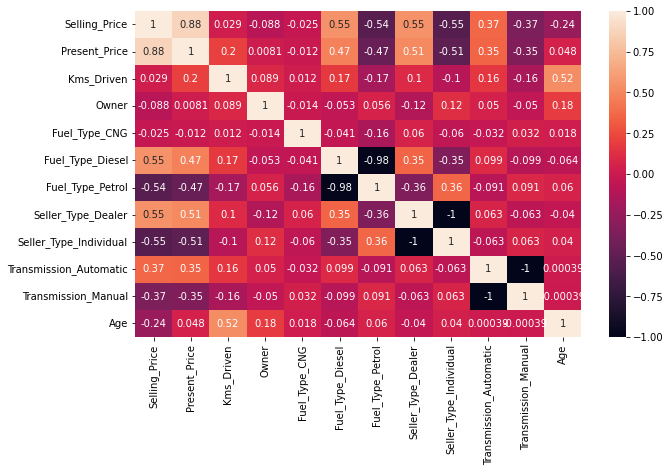

In [11]:
sns.heatmap(df.corr(), annot =True)

### Drop uncorrolated features to clarify insight

In [11]:
df_ = df.drop(labels=["Fuel_Type_CNG", "Fuel_Type_Petrol", "Seller_Type_Individual", "Transmission_Manual"], axis='columns')
df_

,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Seller_Type_Dealer,Transmission_Automatic,Age
0,3.35,5.59,27000,0,0,1,0,5
1,4.75,9.54,43000,0,1,1,0,6
2,7.25,9.85,6900,0,0,1,0,2
3,2.85,4.15,5200,0,0,1,0,8
4,4.60,6.87,42450,0,1,1,0,5
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,1,1,0,3
297,4.00,5.90,60000,0,0,1,0,4
298,3.35,11.00,87934,0,0,1,0,10
299,11.50,12.50,9000,0,1,1,0,2


<AxesSubplot:>

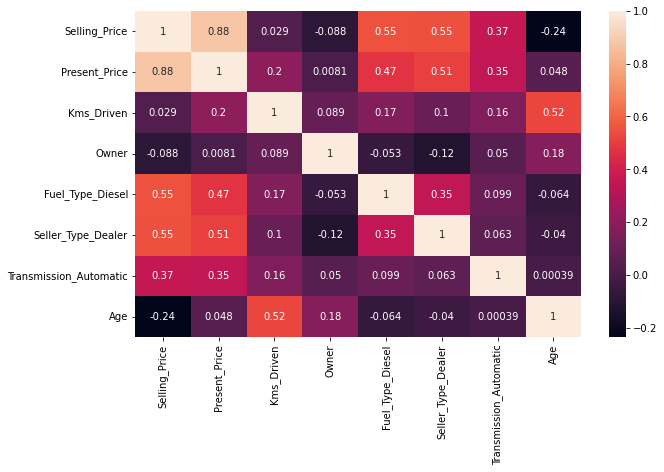

In [13]:
sns.heatmap(df_.corr(), annot=True)

## The relationship between independent variables and dependent variable

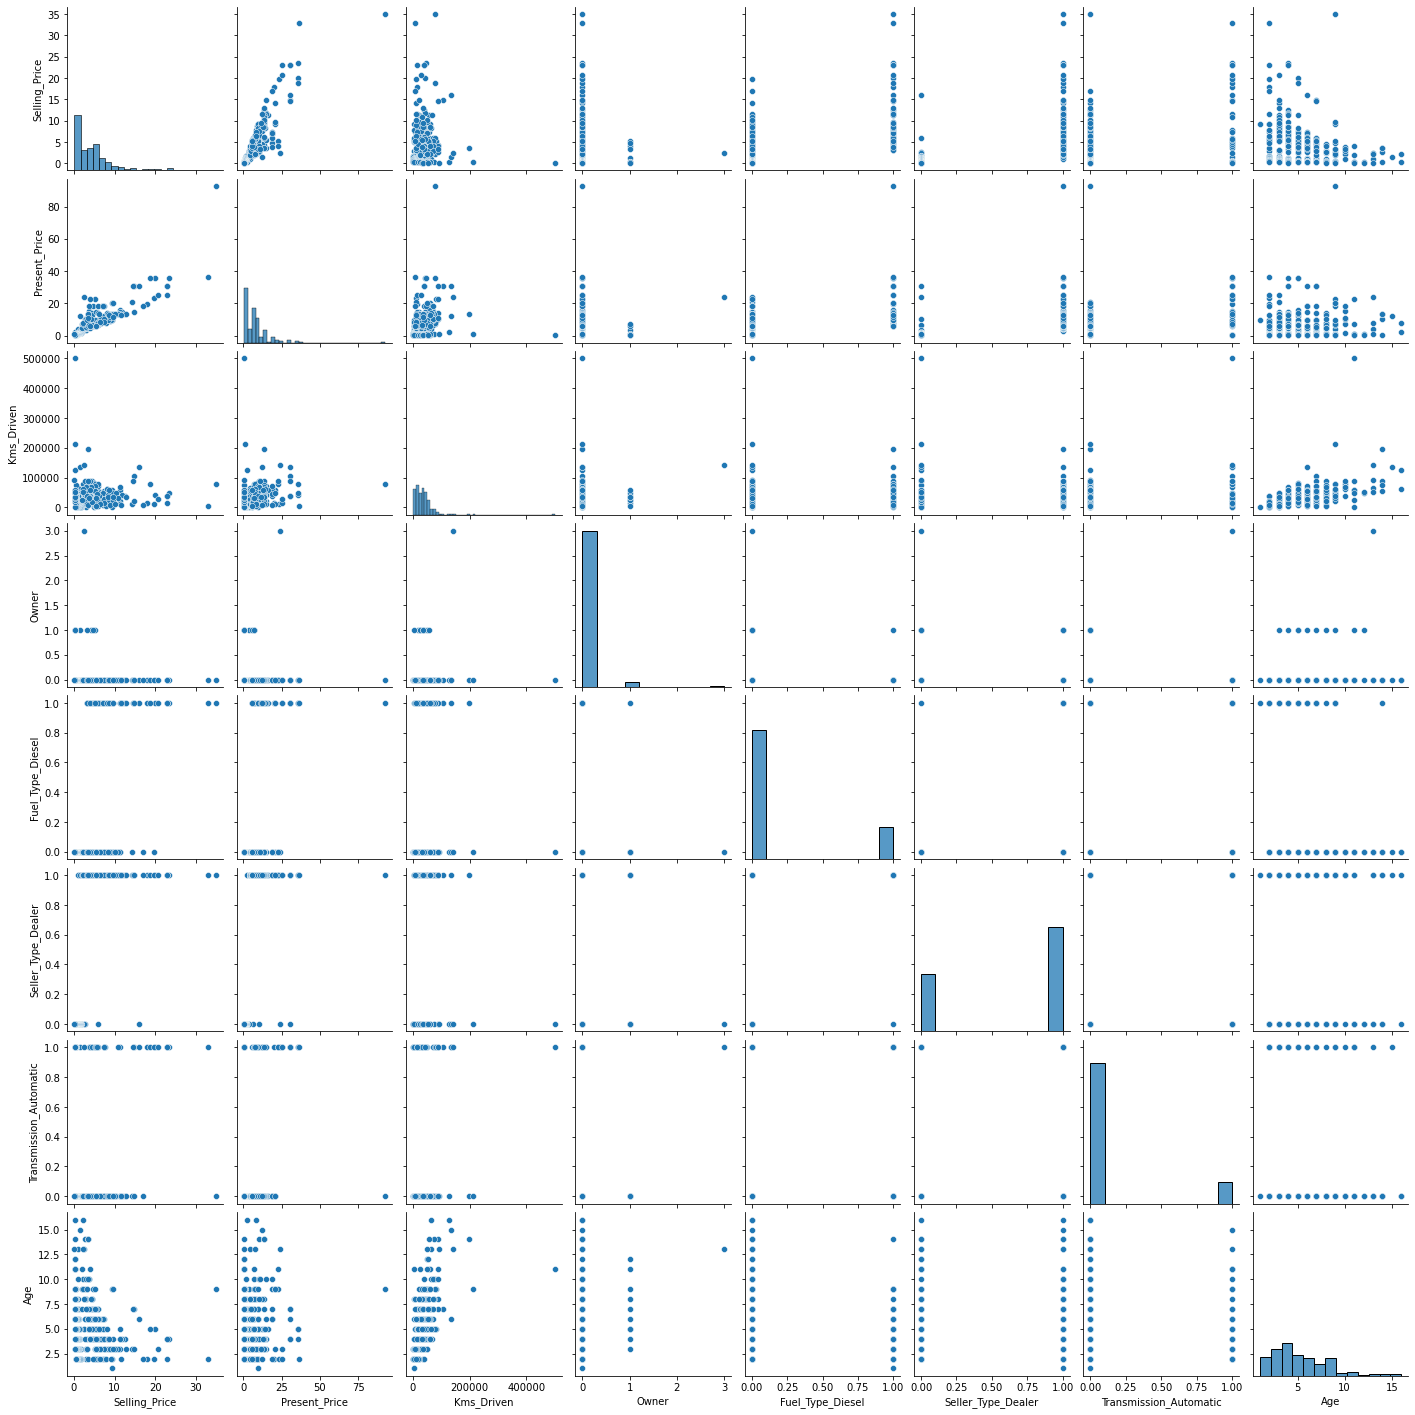

In [14]:
sns.pairplot(df_)

<AxesSubplot:xlabel='Present_Price', ylabel='Selling_Price'>

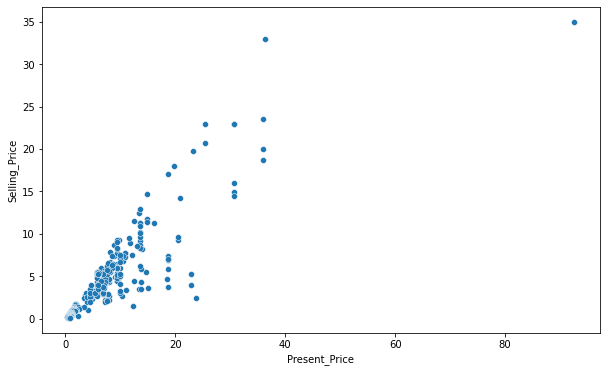

In [15]:
sns.scatterplot(data=df_, y="Selling_Price", x="Present_Price")

<AxesSubplot:xlabel='Seller_Type_Dealer', ylabel='Selling_Price'>

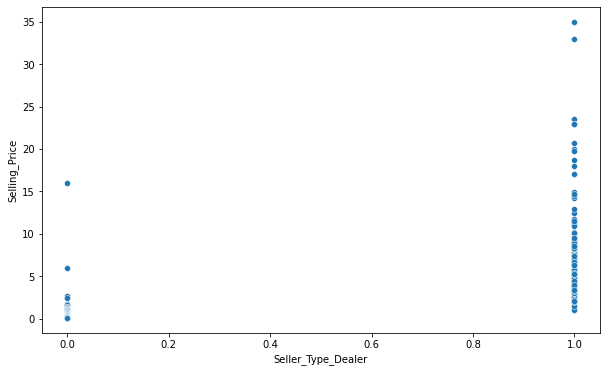

In [16]:
sns.scatterplot(data=df_, y="Selling_Price", x="Seller_Type_Dealer")

<AxesSubplot:xlabel='Transmission_Automatic', ylabel='Selling_Price'>

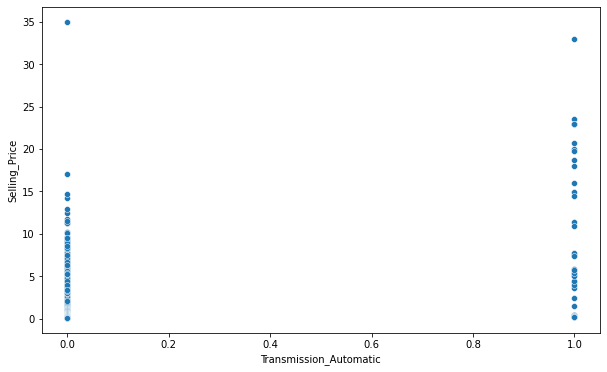

In [17]:
sns.scatterplot(data=df_, x="Transmission_Automatic", y="Selling_Price")

## Correlation between independent variable and dependent variable

In [12]:
corr = df_["Selling_Price"].corr(df_["Present_Price"])
corr

0.8789825451614952

In [13]:
R2 = corr**2
R2

0.77261031469858

## Our First Regression Attempt

<AxesSubplot:xlabel='Present_Price', ylabel='Selling_Price'>

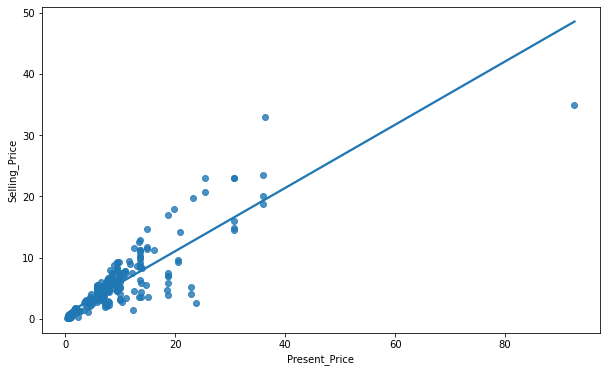

In [20]:
sns.regplot(x="Present_Price", y="Selling_Price", data=df_, ci=None)

In [15]:
X= df_["Present_Price"]
y= df_["Selling_Price"]

In [16]:
slope, intercept = np.polyfit(X, y, deg=1)
slope, intercept

(0.5168490273953965, 0.7185274709817693)

In [17]:
y_pred = slope*X + intercept   # b2*X2 + b1*X + b0
y_pred

0      3.607714
1      5.649267
2      5.809490
3      2.863451
4      4.269280
         ...   
296    6.713976
297    3.767937
298    6.403867
299    7.179140
300    3.767937
Name: Present_Price, Length: 301, dtype: float64

In [24]:
evaluation = {"Actual Price": y, "Predicted": y_pred, "Residual":y-y_pred, "LSE": (y-y_pred)**2}
eval_table = pd.DataFrame(evaluation)
eval_table

,Actual Price,Predicted,Residual,LSE
0,3.35,3.607714,-0.257714,0.066416
1,4.75,5.649267,-0.899267,0.808681
2,7.25,5.809490,1.440510,2.075068
3,2.85,2.863451,-0.013451,0.000181
4,4.60,4.269280,0.330720,0.109376
...,...,...,...,...
296,9.50,6.713976,2.786024,7.761929
297,4.00,3.767937,0.232063,0.053853
298,3.35,6.403867,-3.053867,9.326102
299,11.50,7.179140,4.320860,18.669828


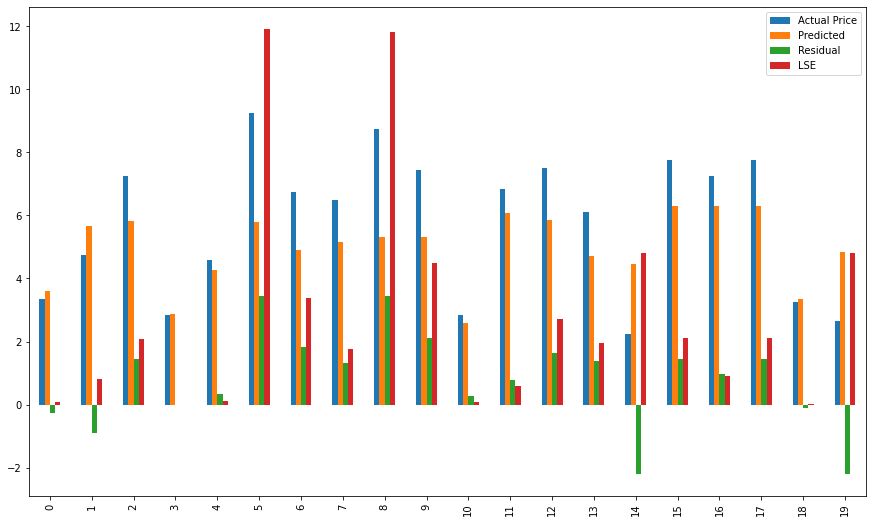

In [25]:
eval_table.head(20).plot(kind ="bar", figsize=(15,9))
plt.show()

## Error Metrics of First Attempt

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
R2 = r2_score(y, y_pred)
R2

0.7726103146985799

In [19]:
mae = mean_absolute_error(y, y_pred)
mae

1.4778880466892335

In [20]:
mse = mean_squared_error(y, y_pred)
mse

5.855089487051356

In [29]:
rmse = np.sqrt(mean_squared_error(y, y_pred))
rmse

2.4197292177124603

### Adjusted R2 Score

In [30]:
def adjusted_r2(y_test, y_pred, df):
    r2 = r2_score(y_test, y_pred)
    n = df.shape[0]   # number of observations
    p = df.shape[1]-1 # number of independent variables 
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [31]:
adjusted_r2(y, y_pred, df_)

0.7671777966197064

### Plotting residuals

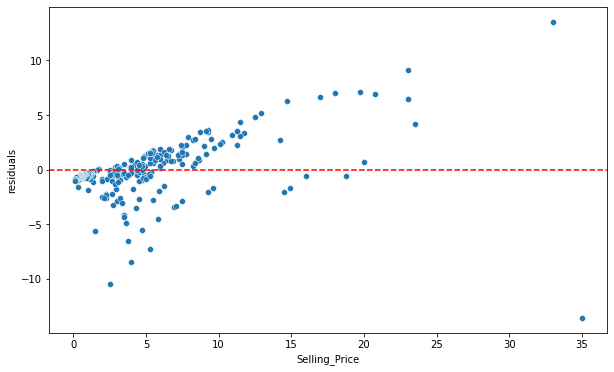

In [21]:
y_test = y
residuals = y_test - y_pred

plt.figure(figsize = (10,6))
sns.scatterplot(x = y_test, y = residuals) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.show()

<AxesSubplot:ylabel='Density'>

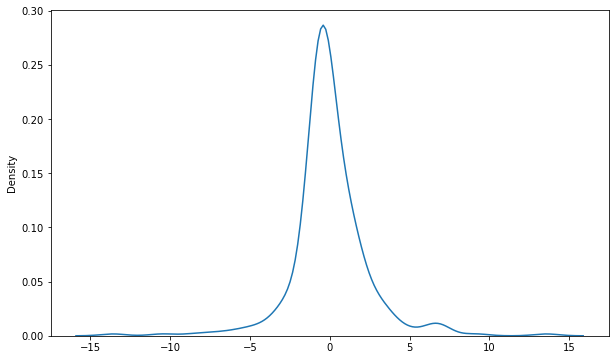

In [33]:
sns.kdeplot(residuals)

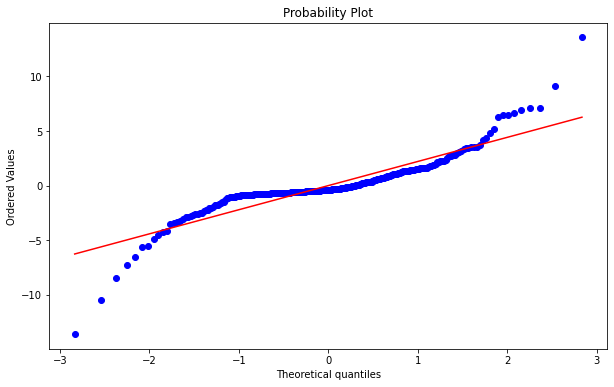

In [34]:
stats.probplot(residuals, dist ="norm", plot =plt);

In [35]:
from scipy.stats import skew
skew(residuals)

0.08387931093393584

## Scaling the Data

Let's define the feature to scale.

In [57]:
df_.describe().T

,count,mean,std,min,25%,50%,75%,max
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0
Fuel_Type_Diesel,301.0,0.199336,0.400166,0.00,0.0,0.0,0.0,1.0
Seller_Type_Dealer,301.0,0.647841,0.478439,0.00,0.0,1.0,1.0,1.0
Transmission_Automatic,301.0,0.132890,0.340021,0.00,0.0,0.0,0.0,1.0
Age,301.0,5.372093,2.891554,1.00,3.0,5.0,7.0,16.0


### Splitting data into training and testing

In [58]:
from sklea### Splitting data into training and testingrn.model_selection import train_test_split

X = df_.drop("Selling_Price", axis =1)
y = df_["Selling_Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =42)

In [59]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = StandardScaler()

In [60]:
scaler.fit(X_train)

StandardScaler()

In [61]:
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[-0.76923237, -0.83904661, -0.18730358, ..., -1.35566878,
         2.85139173,  1.99046855],
       [ 1.26268234,  0.43381798, -0.18730358, ...,  0.73764331,
        -0.35070593,  0.24444351],
       [ 0.38139709,  0.12793616, -0.18730358, ...,  0.73764331,
        -0.35070593, -0.80317152],
       ...,
       [-0.44579392, -0.49554421,  3.38849211, ..., -1.35566878,
        -0.35070593, -0.1047615 ],
       [ 0.292367  ,  0.74767564, -0.18730358, ...,  0.73764331,
        -0.35070593,  0.94285352],
       [-0.63399678, -0.78963873, -0.18730358, ..., -1.35566878,
        -0.35070593, -1.15237653]])

In [62]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-0.77035933, -0.31908751, -0.18730358, -0.48507125, -1.35566878,
         2.85139173, -0.80317152],
       [ 0.69807376, -0.62541635, -0.18730358, -0.48507125,  0.73764331,
        -0.35070593, -0.80317152],
       [ 0.2247492 ,  0.52790469, -0.18730358,  2.06155281,  0.73764331,
        -0.35070593,  0.59364851],
       [-0.77035933, -0.06028433,  3.38849211, -0.48507125, -1.35566878,
        -0.35070593,  0.94285352],
       [ 1.26268234,  0.057377  , -0.18730358, -0.48507125,  0.73764331,
        -0.35070593,  0.24444351],
       [ 0.17065497,  0.11304321, -0.18730358,  2.06155281,  0.73764331,
        -0.35070593, -0.45396651],
       [-0.66893264, -0.27203238, -0.18730358, -0.48507125, -1.35566878,
        -0.35070593, -0.45396651],
       [-0.73542347, -0.69552848, -0.18730358, -0.48507125, -1.35566878,
        -0.35070593, -0.1047615 ],
       [-0.77374022, -0.55436312, -0.18730358, -0.48507125, -1.35566878,
        -0.35070593, -0.80317152],
       [ 0.28673218,  0.1749

### checking std = 1 and mean = 0

this gives us the z-scores. so it's also called z-score 

These values show where in the normal distribution they correspond to the z score.


In [63]:
pd.DataFrame(X_train_scaled).agg(["mean", "std"]).round()

,0,1,2,3,4,5,6
mean,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [64]:
pd.DataFrame(X_test_scaled).agg(["mean", "std"]).round()

,0,1,2,3,4,5,6
mean,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## Linear Regression with Scaled Data

In [65]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [66]:
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [67]:
y_pred = lm.predict(X_test_scaled)
y_train_pred = lm.predict(X_train_scaled)

In [68]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, i):
    
    scores = {i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [69]:
lin_eval =train_val(y_train, y_train_pred, y_test, y_pred, "linear")
lin_eval

,linear_train,linear_test
R2,0.882608,0.875796
mae,1.153308,1.268372
mse,2.881109,3.536602
rmse,1.697383,1.880586


Scores seem to be cared.

In [70]:
scaler = MinMaxScaler()

In [71]:
scaler.fit(X_train)

MinMaxScaler()

In [72]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [73]:
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [74]:
y_pred = lm.predict(X_test_scaled)
y_train_pred = lm.predict(X_train_scaled)

In [75]:
lin_eval = train_val(y_train, y_train_pred, y_test, y_pred, "linear")
lin_eval

,linear_train,linear_test
R2,0.882608,0.875796
mae,1.153308,1.268372
mse,2.881109,3.536602
rmse,1.697383,1.880586


Scores seem okay now. Min-Max Scaling worked better.

## Multicolineratiy

In [76]:
def color_red(val):
    
    if val > 0.85 : # and val < 0.99:
        color = 'red'
    else:
        color = 'black'
    return f'color: {color}'

In [77]:
pd.DataFrame(X).corr().style.applymap(color_red)

,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Seller_Type_Dealer,Transmission_Automatic,Age
Present_Price,1.000000,0.203647,0.008057,0.473306,0.512030,0.348715,0.047584
Kms_Driven,0.203647,1.000000,0.089216,0.172515,0.101419,0.162510,0.524342
Owner,0.008057,0.089216,1.000000,-0.053469,-0.124269,0.050316,0.182104
Fuel_Type_Diesel,0.473306,0.172515,-0.053469,1.000000,0.350467,0.098643,-0.064315
Seller_Type_Dealer,0.512030,0.101419,-0.124269,0.350467,1.000000,0.063240,-0.039896
Transmission_Automatic,0.348715,0.162510,0.050316,0.098643,0.063240,1.000000,0.000394
Age,0.047584,0.524342,0.182104,-0.064315,-0.039896,0.000394,1.000000


## Cross Validate

In [78]:
#from sklearn.metrics import SCORERS
#list(SCORERS.keys())

In [79]:
from sklearn.model_selection import cross_validate, cross_val_score

In [80]:
model = LinearRegression()
scores = cross_validate(model, X_train_scaled, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 5)

In [82]:
pd.DataFrame(scores, index = range(1,6)).T

,1,2,3,4,5
fit_time,0.001999,0.001001,0.001000,0.001000,0.001000
score_time,0.000999,0.001000,0.001001,0.001000,0.001000
test_r2,0.685645,0.823640,0.914359,0.801585,0.892673
test_neg_mean_absolute_error,-1.831569,-1.306124,-0.836905,-1.377989,-1.132805
test_neg_mean_squared_error,-12.891140,-3.320935,-1.029368,-6.454170,-1.905041
test_neg_root_mean_squared_error,-3.590423,-1.822343,-1.014578,-2.540506,-1.380232


In [85]:
scores = pd.DataFrame(scores, index=range(1,6))
scores.iloc[:, 2:].mean()

test_r2                             0.823580
test_neg_mean_absolute_error       -1.297078
test_neg_mean_squared_error        -5.120131
test_neg_root_mean_squared_error   -2.069617
dtype: float64

In [86]:
train_val(y_train, y_train_pred, y_test, y_pred, "linear")

,linear_train,linear_test
R2,0.882608,0.875796
mae,1.153308,1.268372
mse,2.881109,3.536602
rmse,1.697383,1.880586


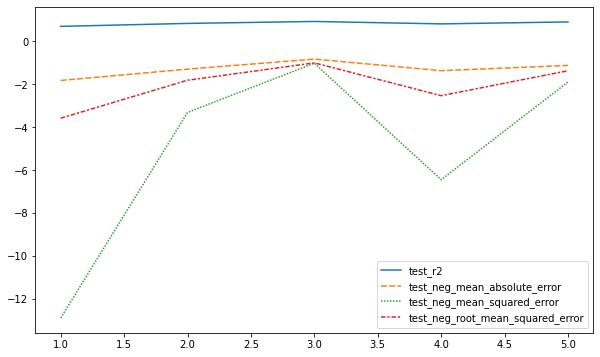

In [87]:
sns.lineplot(data = scores.iloc[:,2:]);

In [88]:
lm.coef_

array([38.43604902, -2.22752417, -3.08042873,  2.0070214 ,  1.13603224,
        1.44371987, -4.99322074])

In [89]:
lm_df = pd.DataFrame(lm.coef_, columns = ["lm_coef"])
lm_df

,lm_coef
0,38.436049
1,-2.227524
2,-3.080429
3,2.007021
4,1.136032
5,1.443720
6,-4.993221


## Ridge Regression

In [90]:
from sklearn.linear_model import Ridge

In [91]:
ridge_model = Ridge(alpha=1, random_state=42)

In [92]:
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=1, random_state=42)

In [93]:
y_pred = ridge_model.predict(X_test_scaled)
y_train_pred = ridge_model.predict(X_train_scaled)

In [94]:
ridge_eval = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
ridge_eval

,ridge_train,ridge_test
R2,0.812040,0.801682
mae,1.393390,1.503618
mse,4.613038,5.646945
rmse,2.147798,2.376330


In [96]:
pd.concat([lin_eval, ridge_eval], axis=1)

,linear_train,linear_test,ridge_train,ridge_test
R2,0.882608,0.875796,0.812040,0.801682
mae,1.153308,1.268372,1.393390,1.503618
mse,2.881109,3.536602,4.613038,5.646945
rmse,1.697383,1.880586,2.147798,2.376330


Ridge seems not working. But we have to be sure.

## For Ridge Regression CV with alpha : 1 

In [97]:
model = Ridge(alpha=1, random_state=42)
scores = cross_validate(model, X_train_scaled, y_train,
                    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [98]:
pd.DataFrame(scores, index = range(1, 6)).T

,1,2,3,4,5
fit_time,0.002000,0.000000,0.001000,0.001000,0.001001
score_time,0.001001,0.002000,0.001001,0.001000,0.000998
test_r2,0.731358,0.767419,0.796347,0.673739,0.869258
test_neg_mean_absolute_error,-2.009592,-1.497360,-1.117426,-1.910617,-1.149349
test_neg_mean_squared_error,-11.016530,-4.379599,-2.447812,-10.612811,-2.320653
test_neg_root_mean_squared_error,-3.319116,-2.092749,-1.564548,-3.257731,-1.523369


In [99]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:].mean()

test_r2                             0.767624
test_neg_mean_absolute_error       -1.536869
test_neg_mean_squared_error        -6.155481
test_neg_root_mean_squared_error   -2.351503
dtype: float64

In [100]:
train_val(y_train, y_train_pred, y_test, y_pred, "ridge")

,ridge_train,ridge_test
R2,0.812040,0.801682
mae,1.393390,1.503618
mse,4.613038,5.646945
rmse,2.147798,2.376330


<AxesSubplot:>

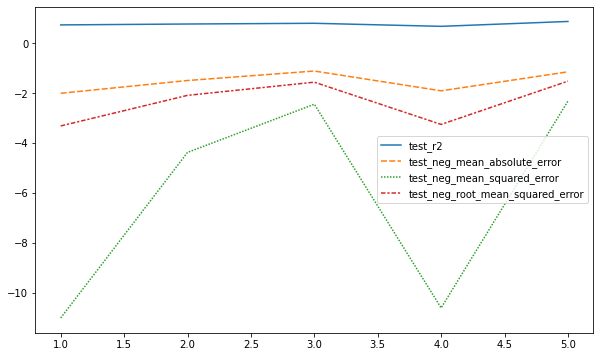

In [76]:
sns.lineplot(data = scores.iloc[:,2:])

In [101]:
ridge_model.coef_

array([20.94995178, -1.17704612, -1.40200582,  3.35306421,  2.41934144,
        2.46429185, -4.01893122])

In [102]:
rm_df = pd.DataFrame(ridge_model.coef_, columns = ["ridge_coef_1"])

In [103]:
pd.concat([lm_df,rm_df], axis = 1)

,lm_coef,ridge_coef_1
0,38.436049,20.949952
1,-2.227524,-1.177046
2,-3.080429,-1.402006
3,2.007021,3.353064
4,1.136032,2.419341
5,1.443720,2.464292
6,-4.993221,-4.018931


## Choosing best alpha value with Cross-Validation

In [104]:
from sklearn.linear_model import RidgeCV

In [119]:
alpha_space = np.linspace(0.1, 0.2, 1000)
alpha_space

array([0.1       , 0.1001001 , 0.1002002 , 0.1003003 , 0.1004004 ,
       0.1005005 , 0.1006006 , 0.1007007 , 0.1008008 , 0.1009009 ,
       0.101001  , 0.1011011 , 0.1012012 , 0.1013013 , 0.1014014 ,
       0.1015015 , 0.1016016 , 0.1017017 , 0.1018018 , 0.1019019 ,
       0.102002  , 0.1021021 , 0.1022022 , 0.1023023 , 0.1024024 ,
       0.1025025 , 0.1026026 , 0.1027027 , 0.1028028 , 0.1029029 ,
       0.103003  , 0.1031031 , 0.1032032 , 0.1033033 , 0.1034034 ,
       0.1035035 , 0.1036036 , 0.1037037 , 0.1038038 , 0.1039039 ,
       0.104004  , 0.1041041 , 0.1042042 , 0.1043043 , 0.1044044 ,
       0.1045045 , 0.1046046 , 0.1047047 , 0.1048048 , 0.1049049 ,
       0.10500501, 0.10510511, 0.10520521, 0.10530531, 0.10540541,
       0.10550551, 0.10560561, 0.10570571, 0.10580581, 0.10590591,
       0.10600601, 0.10610611, 0.10620621, 0.10630631, 0.10640641,
       0.10650651, 0.10660661, 0.10670671, 0.10680681, 0.10690691,
       0.10700701, 0.10710711, 0.10720721, 0.10730731, 0.10740

In [120]:
ridge_cv_model = RidgeCV(alphas=alpha_space, cv = 5, scoring= "neg_root_mean_squared_error")

In [121]:
ridge_cv_model.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([0.1       , 0.1001001 , 0.1002002 , 0.1003003 , 0.1004004 ,
       0.1005005 , 0.1006006 , 0.1007007 , 0.1008008 , 0.1009009 ,
       0.101001  , 0.1011011 , 0.1012012 , 0.1013013 , 0.1014014 ,
       0.1015015 , 0.1016016 , 0.1017017 , 0.1018018 , 0.1019019 ,
       0.102002  , 0.1021021 , 0.1022022 , 0.1023023 , 0.1024024 ,
       0.1025025 , 0.1026026 , 0.1027027 , 0.1028028 , 0.1029029 ,
       0.103003  , 0.1031031 , 0.1032032 , 0.10330...
       0.1965966 , 0.1966967 , 0.1967968 , 0.1968969 , 0.196997  ,
       0.1970971 , 0.1971972 , 0.1972973 , 0.1973974 , 0.1974975 ,
       0.1975976 , 0.1976977 , 0.1977978 , 0.1978979 , 0.197998  ,
       0.1980981 , 0.1981982 , 0.1982983 , 0.1983984 , 0.1984985 ,
       0.1985986 , 0.1986987 , 0.1987988 , 0.1988989 , 0.198999  ,
       0.1990991 , 0.1991992 , 0.1992993 , 0.1993994 , 0.1994995 ,
       0.1995996 , 0.1996997 , 0.1997998 , 0.1998999 , 0.2       ]),
        cv=5, scoring='neg_root_mean_squared_error')

In [122]:
ridge_cv_model.alpha_

0.16646646646646646

In [123]:
#rmse for ridge with CV
ridge_cv_model.best_score_

-1.7814811815652078

In [124]:
y_pred = ridge_cv_model.predict(X_test_scaled)
y_train_pred = ridge_cv_model.predict(X_train_scaled)

In [125]:
ridge_cv_eval = train_val(y_train, y_train_pred, y_test, y_pred, "ridge_cv")
ridge_cv_eval

,ridge_cv_train,ridge_cv_test
R2,0.877403,0.862673
mae,1.178529,1.317049
mse,3.008851,3.910281
rmse,1.734604,1.977443


In [126]:
pd.concat([lin_eval, ridge_eval, ridge_cv_eval], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test
R2,0.882608,0.875796,0.812040,0.801682,0.877403,0.862673
mae,1.153308,1.268372,1.393390,1.503618,1.178529,1.317049
mse,2.881109,3.536602,4.613038,5.646945,3.008851,3.910281
rmse,1.697383,1.880586,2.147798,2.376330,1.734604,1.977443


In [127]:
ridge_cv_model.coef_

array([33.68153686, -1.92043882, -2.5834464 ,  2.38472834,  1.48854715,
        1.73696167, -4.76867848])

In [131]:
rcm_df = pd.DataFrame(ridge_cv_model.coef_, columns=["ridge_cv_coef_0.1665"])

In [132]:
pd.concat([lm_df,rm_df, rcm_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_cv_coef_0.1665
0,38.436049,20.949952,33.681537
1,-2.227524,-1.177046,-1.920439
2,-3.080429,-1.402006,-2.583446
3,2.007021,3.353064,2.384728
4,1.136032,2.419341,1.488547
5,1.443720,2.464292,1.736962
6,-4.993221,-4.018931,-4.768678


## LASSO

In [133]:
from sklearn.linear_model import Lasso, LassoCV

In [134]:
lasso_model = Lasso(alpha=1, random_state=42)
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=1, random_state=42)

In [135]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

In [136]:
las_eval = train_val(y_train, y_train_pred, y_test, y_pred, "lasso")
las_eval

,lasso_train,lasso_test
R2,0.126310,0.121726
mae,2.964977,3.372374
mse,21.442652,25.008152
rmse,4.630621,5.000815


In [137]:
pd.concat([lin_eval, ridge_eval, ridge_cv_eval, las_eval], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test
R2,0.882608,0.875796,0.812040,0.801682,0.877403,0.862673,0.126310,0.121726
mae,1.153308,1.268372,1.393390,1.503618,1.178529,1.317049,2.964977,3.372374
mse,2.881109,3.536602,4.613038,5.646945,3.008851,3.910281,21.442652,25.008152
rmse,1.697383,1.880586,2.147798,2.376330,1.734604,1.977443,4.630621,5.000815


## For Lasso CV with Default Alpha : 1

In [138]:
model = Lasso(alpha=1, random_state=42)
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [140]:
pd.DataFrame(scores, index = range(1, 6)).T

,1,2,3,4,5
fit_time,0.002000,0.002002,0.001000,0.001000,0.002001
score_time,0.001000,0.000999,0.001000,0.001000,0.001000
test_r2,0.059427,0.140922,0.249191,0.058324,0.177001
test_neg_mean_absolute_error,-3.791034,-3.020915,-2.116144,-3.251211,-2.908517
test_neg_mean_squared_error,-38.571288,-16.176800,-9.024363,-30.631407,-14.608111
test_neg_root_mean_squared_error,-6.210579,-4.022039,-3.004058,-5.534565,-3.822056


In [141]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:].mean()

test_r2                              0.136973
test_neg_mean_absolute_error        -3.017564
test_neg_mean_squared_error        -21.802394
test_neg_root_mean_squared_error    -4.518659
dtype: float64

In [142]:
train_val(y_train, y_train_pred, y_test, y_pred, "lasso")

,lasso_train,lasso_test
R2,0.126310,0.121726
mae,2.964977,3.372374
mse,21.442652,25.008152
rmse,4.630621,5.000815


<AxesSubplot:>

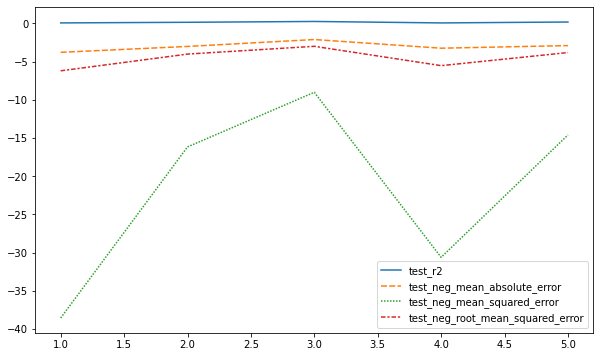

In [143]:
sns.lineplot(data = scores.iloc[:,2:])

In [144]:
lasso_model.coef_

array([ 0.        ,  0.        , -0.        ,  0.22328447,  1.15465895,
        0.        , -0.        ])

In [145]:
lsm_df = pd.DataFrame(lasso_model.coef_, columns = ["lasso_coef_1"])

In [146]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_cv_coef_0.1665,lasso_coef_1
0,38.436049,20.949952,33.681537,0.000000
1,-2.227524,-1.177046,-1.920439,0.000000
2,-3.080429,-1.402006,-2.583446,-0.000000
3,2.007021,3.353064,2.384728,0.223284
4,1.136032,2.419341,1.488547,1.154659
5,1.443720,2.464292,1.736962,0.000000
6,-4.993221,-4.018931,-4.768678,-0.000000


### Choosing best alpha value with Cross-Validation

In [147]:
alpha_space = np.linspace(0.03, 0.04, 1000)
alpha_space

array([0.03      , 0.03001001, 0.03002002, 0.03003003, 0.03004004,
       0.03005005, 0.03006006, 0.03007007, 0.03008008, 0.03009009,
       0.0301001 , 0.03011011, 0.03012012, 0.03013013, 0.03014014,
       0.03015015, 0.03016016, 0.03017017, 0.03018018, 0.03019019,
       0.0302002 , 0.03021021, 0.03022022, 0.03023023, 0.03024024,
       0.03025025, 0.03026026, 0.03027027, 0.03028028, 0.03029029,
       0.0303003 , 0.03031031, 0.03032032, 0.03033033, 0.03034034,
       0.03035035, 0.03036036, 0.03037037, 0.03038038, 0.03039039,
       0.0304004 , 0.03041041, 0.03042042, 0.03043043, 0.03044044,
       0.03045045, 0.03046046, 0.03047047, 0.03048048, 0.03049049,
       0.0305005 , 0.03051051, 0.03052052, 0.03053053, 0.03054054,
       0.03055055, 0.03056056, 0.03057057, 0.03058058, 0.03059059,
       0.0306006 , 0.03061061, 0.03062062, 0.03063063, 0.03064064,
       0.03065065, 0.03066066, 0.03067067, 0.03068068, 0.03069069,
       0.0307007 , 0.03071071, 0.03072072, 0.03073073, 0.03074

In [148]:
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 5, max_iter=100000, random_state=42)

In [149]:
lasso_cv_model.fit(X_train_scaled, y_train)

LassoCV(alphas=array([0.03      , 0.03001001, 0.03002002, 0.03003003, 0.03004004,
       0.03005005, 0.03006006, 0.03007007, 0.03008008, 0.03009009,
       0.0301001 , 0.03011011, 0.03012012, 0.03013013, 0.03014014,
       0.03015015, 0.03016016, 0.03017017, 0.03018018, 0.03019019,
       0.0302002 , 0.03021021, 0.03022022, 0.03023023, 0.03024024,
       0.03025025, 0.03026026, 0.03027027, 0.03028028, 0.03029029,
       0.0303...
       0.03970971, 0.03971972, 0.03972973, 0.03973974, 0.03974975,
       0.03975976, 0.03976977, 0.03977978, 0.03978979, 0.0397998 ,
       0.03980981, 0.03981982, 0.03982983, 0.03983984, 0.03984985,
       0.03985986, 0.03986987, 0.03987988, 0.03988989, 0.0398999 ,
       0.03990991, 0.03991992, 0.03992993, 0.03993994, 0.03994995,
       0.03995996, 0.03996997, 0.03997998, 0.03998999, 0.04      ]),
        cv=5, max_iter=100000, random_state=42)

In [150]:
lasso_cv_model.alpha_

0.03092092092092092

In [151]:
np.where(alpha_space[::-1]==lasso_cv_model.alpha_)

(array([907], dtype=int64),)

In [153]:
alpha_space[::907]

array([0.03      , 0.03907908])

In [154]:
#mse score for CV
lasso_cv_model.mse_path_[907].mean()

3.4527131948766483

In [155]:
y_pred = lasso_cv_model.predict(X_test_scaled)   #Lasso(alpha =0.03)
y_train_pred = lasso_cv_model.predict(X_train_scaled)

In [156]:
las_cv_eval = train_val(y_train, y_train_pred, y_test, y_pred, "lasso_cv")
las_cv_eval

,lasso_cv_train,lasso_cv_test
R2,0.872171,0.855485
mae,1.149545,1.313083
mse,3.137269,4.114945
rmse,1.771234,2.028533


In [157]:
pd.concat([lin_eval,ridge_eval, ridge_cv_eval, las_eval, las_cv_eval], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test
R2,0.882608,0.875796,0.812040,0.801682,0.877403,0.862673,0.126310,0.121726,0.872171,0.855485
mae,1.153308,1.268372,1.393390,1.503618,1.178529,1.317049,2.964977,3.372374,1.149545,1.313083
mse,2.881109,3.536602,4.613038,5.646945,3.008851,3.910281,21.442652,25.008152,3.137269,4.114945
rmse,1.697383,1.880586,2.147798,2.376330,1.734604,1.977443,4.630621,5.000815,1.771234,2.028533


In [158]:
lasso_cv_model.coef_

array([33.59900212, -0.        , -0.        ,  2.22611936,  1.45917   ,
        1.26934428, -4.72865266])

In [159]:
lcm_df = pd.DataFrame(lasso_cv_model.coef_, columns = ["lasso_cv_coef_0.03"])

In [160]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_cv_coef_0.1665,lasso_coef_1,lasso_cv_coef_0.03
0,38.436049,20.949952,33.681537,0.000000,33.599002
1,-2.227524,-1.177046,-1.920439,0.000000,-0.000000
2,-3.080429,-1.402006,-2.583446,-0.000000,-0.000000
3,2.007021,3.353064,2.384728,0.223284,2.226119
4,1.136032,2.419341,1.488547,1.154659,1.459170
5,1.443720,2.464292,1.736962,0.000000,1.269344
6,-4.993221,-4.018931,-4.768678,-0.000000,-4.728653


## Elastic net

In [161]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [162]:
elastic_model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=42)
elastic_model.fit(X_train_scaled, y_train)

ElasticNet(alpha=1, random_state=42)

In [163]:
y_pred = elastic_model.predict(X_test_scaled)
y_train_pred = elastic_model.predict(X_train_scaled)

In [164]:
els_eval = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")
els_eval

,elastic_train,elastic_test
R2,0.160943,0.150442
mae,2.922451,3.309815
mse,20.592665,24.190476
rmse,4.537914,4.918381


In [165]:
pd.concat([lin_eval,ridge_eval, ridge_cv_eval, las_eval, las_cv_eval, els_eval], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test
R2,0.882608,0.875796,0.812040,0.801682,0.877403,0.862673,0.126310,0.121726,0.872171,0.855485,0.160943,0.150442
mae,1.153308,1.268372,1.393390,1.503618,1.178529,1.317049,2.964977,3.372374,1.149545,1.313083,2.922451,3.309815
mse,2.881109,3.536602,4.613038,5.646945,3.008851,3.910281,21.442652,25.008152,3.137269,4.114945,20.592665,24.190476
rmse,1.697383,1.880586,2.147798,2.376330,1.734604,1.977443,4.630621,5.000815,1.771234,2.028533,4.537914,4.918381


## For Elastic_net CV with Default alpha = 1 and l1_ratio=0.5

In [186]:
model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=42)
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [187]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:].T

,1,2,3,4,5
test_r2,0.107767,0.185911,0.238810,0.097920,0.234770
test_neg_mean_absolute_error,-3.672837,-2.918524,-2.118007,-3.177143,-2.819610
test_neg_mean_squared_error,-36.588929,-15.329633,-9.149143,-29.343410,-13.582724
test_neg_root_mean_squared_error,-6.048878,-3.915308,-3.024755,-5.416956,-3.685475


In [188]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                              0.173036
test_neg_mean_absolute_error        -2.941224
test_neg_mean_squared_error        -20.798768
test_neg_root_mean_squared_error    -4.418274
dtype: float64

In [189]:
train_val(y_train, y_train_pred, y_test, y_pred, "elastic")

,elastic_train,elastic_test
R2,0.160943,0.150442
mae,2.922451,3.309815
mse,20.592665,24.190476
rmse,4.537914,4.918381


In [190]:
elastic_model.coef_

array([ 0.        ,  0.        , -0.        ,  0.83201613,  0.9963404 ,
        0.        , -0.        ])

In [191]:
em_df = pd.DataFrame(elastic_model.coef_, columns=["elastic_coef_(alp:1, l1:0.5)"])

In [192]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df, em_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_cv_coef_0.1665,lasso_coef_1,lasso_cv_coef_0.03,"elastic_coef_(alp:1, l1:0.5)"
0,38.436049,20.949952,33.681537,0.000000,33.599002,0.000000
1,-2.227524,-1.177046,-1.920439,0.000000,-0.000000,0.000000
2,-3.080429,-1.402006,-2.583446,-0.000000,-0.000000,-0.000000
3,2.007021,3.353064,2.384728,0.223284,2.226119,0.832016
4,1.136032,2.419341,1.488547,1.154659,1.459170,0.996340
5,1.443720,2.464292,1.736962,0.000000,1.269344,0.000000
6,-4.993221,-4.018931,-4.768678,-0.000000,-4.728653,-0.000000


### Choosing best alpha and l1_ratio values with Cross-Validation

In [195]:
alpha_space = np.linspace(0.01, 0.02, 1000)
alpha_space

array([0.01      , 0.01001001, 0.01002002, 0.01003003, 0.01004004,
       0.01005005, 0.01006006, 0.01007007, 0.01008008, 0.01009009,
       0.0101001 , 0.01011011, 0.01012012, 0.01013013, 0.01014014,
       0.01015015, 0.01016016, 0.01017017, 0.01018018, 0.01019019,
       0.0102002 , 0.01021021, 0.01022022, 0.01023023, 0.01024024,
       0.01025025, 0.01026026, 0.01027027, 0.01028028, 0.01029029,
       0.0103003 , 0.01031031, 0.01032032, 0.01033033, 0.01034034,
       0.01035035, 0.01036036, 0.01037037, 0.01038038, 0.01039039,
       0.0104004 , 0.01041041, 0.01042042, 0.01043043, 0.01044044,
       0.01045045, 0.01046046, 0.01047047, 0.01048048, 0.01049049,
       0.0105005 , 0.01051051, 0.01052052, 0.01053053, 0.01054054,
       0.01055055, 0.01056056, 0.01057057, 0.01058058, 0.01059059,
       0.0106006 , 0.01061061, 0.01062062, 0.01063063, 0.01064064,
       0.01065065, 0.01066066, 0.01067067, 0.01068068, 0.01069069,
       0.0107007 , 0.01071071, 0.01072072, 0.01073073, 0.01074

In [196]:
elastic_cv_model = ElasticNetCV(alphas = alpha_space, l1_ratio=[0.1, 0.5, 0.7,0.9, 0.95, 1], cv = 5, 
                                max_iter = 100000,random_state=42)

In [197]:
elastic_cv_model.fit(X_train_scaled, y_train)

ElasticNetCV(alphas=array([0.01      , 0.01001001, 0.01002002, 0.01003003, 0.01004004,
       0.01005005, 0.01006006, 0.01007007, 0.01008008, 0.01009009,
       0.0101001 , 0.01011011, 0.01012012, 0.01013013, 0.01014014,
       0.01015015, 0.01016016, 0.01017017, 0.01018018, 0.01019019,
       0.0102002 , 0.01021021, 0.01022022, 0.01023023, 0.01024024,
       0.01025025, 0.01026026, 0.01027027, 0.01028028, 0.01029029,
       0...
       0.01970971, 0.01971972, 0.01972973, 0.01973974, 0.01974975,
       0.01975976, 0.01976977, 0.01977978, 0.01978979, 0.0197998 ,
       0.01980981, 0.01981982, 0.01982983, 0.01983984, 0.01984985,
       0.01985986, 0.01986987, 0.01987988, 0.01988989, 0.0198999 ,
       0.01990991, 0.01991992, 0.01992993, 0.01993994, 0.01994995,
       0.01995996, 0.01996997, 0.01997998, 0.01998999, 0.02      ]),
             cv=5, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1], max_iter=100000,
             random_state=42)

In [198]:
elastic_cv_model.alpha_

0.012122122122122122

In [199]:
elastic_cv_model.l1_ratio_

0.95

In [200]:
#mse score for CV
elastic_cv_model.mse_path_[5][-1].mean()

4.05712189239645

In [201]:
y_pred = elastic_cv_model.predict(X_test_scaled)
y_train_pred = elastic_cv_model.predict(X_train_scaled)

In [202]:
els_cv_eval = train_val(y_train, y_train_pred, y_test, y_pred, "elastic_cv")
els_cv_eval

,elastic_cv_train,elastic_cv_test
R2,0.874219,0.857312
mae,1.164032,1.326457
mse,3.086985,4.062919
rmse,1.756982,2.015668


In [203]:
pd.concat([lin_eval,ridge_eval, ridge_cv_eval, las_eval, las_cv_eval, els_eval, els_cv_eval], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test,elastic_cv_train,elastic_cv_test
R2,0.882608,0.875796,0.812040,0.801682,0.877403,0.862673,0.126310,0.121726,0.872171,0.855485,0.160943,0.150442,0.874219,0.857312
mae,1.153308,1.268372,1.393390,1.503618,1.178529,1.317049,2.964977,3.372374,1.149545,1.313083,2.922451,3.309815,1.164032,1.326457
mse,2.881109,3.536602,4.613038,5.646945,3.008851,3.910281,21.442652,25.008152,3.137269,4.114945,20.592665,24.190476,3.086985,4.062919
rmse,1.697383,1.880586,2.147798,2.376330,1.734604,1.977443,4.630621,5.000815,1.771234,2.028533,4.537914,4.918381,1.756982,2.015668


In [204]:
elastic_cv_model.coef_

array([33.0262741 , -0.15056707, -1.39613351,  2.346255  ,  1.5165109 ,
        1.54677587, -4.94378184])

In [205]:
ecm_df = pd.DataFrame(elastic_cv_model.coef_, columns=["elastic_coef_(alp:0.01, l1:1)"])

In [206]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df, em_df, ecm_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_cv_coef_0.1665,lasso_coef_1,lasso_cv_coef_0.03,"elastic_coef_(alp:1, l1:0.5)","elastic_coef_(alp:0.01, l1:1)"
0,38.436049,20.949952,33.681537,0.000000,33.599002,0.000000,33.026274
1,-2.227524,-1.177046,-1.920439,0.000000,-0.000000,0.000000,-0.150567
2,-3.080429,-1.402006,-2.583446,-0.000000,-0.000000,-0.000000,-1.396134
3,2.007021,3.353064,2.384728,0.223284,2.226119,0.832016,2.346255
4,1.136032,2.419341,1.488547,1.154659,1.459170,0.996340,1.516511
5,1.443720,2.464292,1.736962,0.000000,1.269344,0.000000,1.546776
6,-4.993221,-4.018931,-4.768678,-0.000000,-4.728653,-0.000000,-4.943782


## Grid Search

In [183]:
from sklearn.model_selection import GridSearchCV

In [184]:
elastic_model = ElasticNet(max_iter=10000, random_state=42)

In [185]:
param_grid = {"alpha":[0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
            "l1_ratio":[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}

In [186]:
grid_model = GridSearchCV(estimator = elastic_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =5, verbose =2)

In [187]:
grid_model.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.7; total time=   0.0s
[CV] END ...........................alpha=0.01,

[CV] END ............................alpha=0.7, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.7; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=5, estimator=ElasticNet(max_iter=10000, random_state=42),
             param_grid={'alpha': [0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [188]:
grid_model.best_params_

{'alpha': 0.012, 'l1_ratio': 0.95}

In [189]:
pd.DataFrame(grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001800,4.003526e-04,0.000200,0.000400,0.01,0.1,"{'alpha': 0.01, 'l1_ratio': 0.1}",-3.764947,-2.193469,-1.715809,-3.453505,-1.594221,-2.544390,0.897637,13
1,0.001200,4.009976e-04,0.000600,0.000490,0.01,0.5,"{'alpha': 0.01, 'l1_ratio': 0.5}",-3.188023,-2.077588,-1.514676,-3.216468,-1.499218,-2.299195,0.766283,11
2,0.001400,4.896101e-04,0.000200,0.000400,0.01,0.7,"{'alpha': 0.01, 'l1_ratio': 0.7}",-2.601951,-1.996813,-1.358041,-3.034898,-1.435809,-2.085503,0.652264,9
3,0.001401,4.890466e-04,0.000000,0.000000,0.01,0.9,"{'alpha': 0.01, 'l1_ratio': 0.9}",-1.727174,-1.899079,-1.147106,-2.780933,-1.369632,-1.784785,0.563503,3
4,0.001000,1.076850e-06,0.000800,0.000400,0.01,0.95,"{'alpha': 0.01, 'l1_ratio': 0.95}",-1.831773,-1.877097,-1.087953,-2.702293,-1.357143,-1.771252,0.551378,2
5,0.001200,4.004717e-04,0.000600,0.000490,0.01,0.99,"{'alpha': 0.01, 'l1_ratio': 0.99}",-2.414346,-1.862556,-1.041892,-2.635082,-1.350735,-1.860922,0.606087,6
6,0.001600,4.897847e-04,0.000600,0.000490,0.01,1,"{'alpha': 0.01, 'l1_ratio': 1}",-2.663339,-1.859558,-1.030894,-2.617749,-1.349839,-1.904276,0.656874,8
7,0.001400,4.898430e-04,0.000400,0.000490,0.012,0.1,"{'alpha': 0.012, 'l1_ratio': 0.1}",-3.929429,-2.237768,-1.779767,-3.539189,-1.627492,-2.622729,0.937725,14
8,0.001200,3.999472e-04,0.000200,0.000400,0.012,0.5,"{'alpha': 0.012, 'l1_ratio': 0.5}",-3.410340,-2.119274,-1.580962,-3.301860,-1.528311,-2.388149,0.817668,12
9,0.001000,4.101908e-07,0.000400,0.000490,0.012,0.7,"{'alpha': 0.012, 'l1_ratio': 0.7}",-2.851561,-2.026729,-1.415705,-3.110709,-1.456980,-2.172337,0.699617,10


In [190]:
grid_model.best_index_

11

In [191]:
grid_model.best_score_

-1.7606754476527287

## Using Best Hyper Parameters From GridSearch

In [192]:
y_pred = grid_model.predict(X_test_scaled)
y_train_pred = grid_model.predict(X_train_scaled)

In [193]:
train_val(y_train, y_train_pred, y_test, y_pred, "GridSearch")

,GridSearch_train,GridSearch_test
R2,0.874372,0.857522
mae,1.163828,1.325895
mse,3.083253,4.056952
rmse,1.755919,2.014188


## Final Model

In [207]:
final_scaler = MinMaxScaler()
X_scaled = final_scaler.fit_transform(X)

In [208]:
final_model = Lasso(alpha=0.0309) #lasso_cv_model

In [209]:
final_model.fit(X_scaled, y)

Lasso(alpha=0.0309)

## Feature importances with Ridge

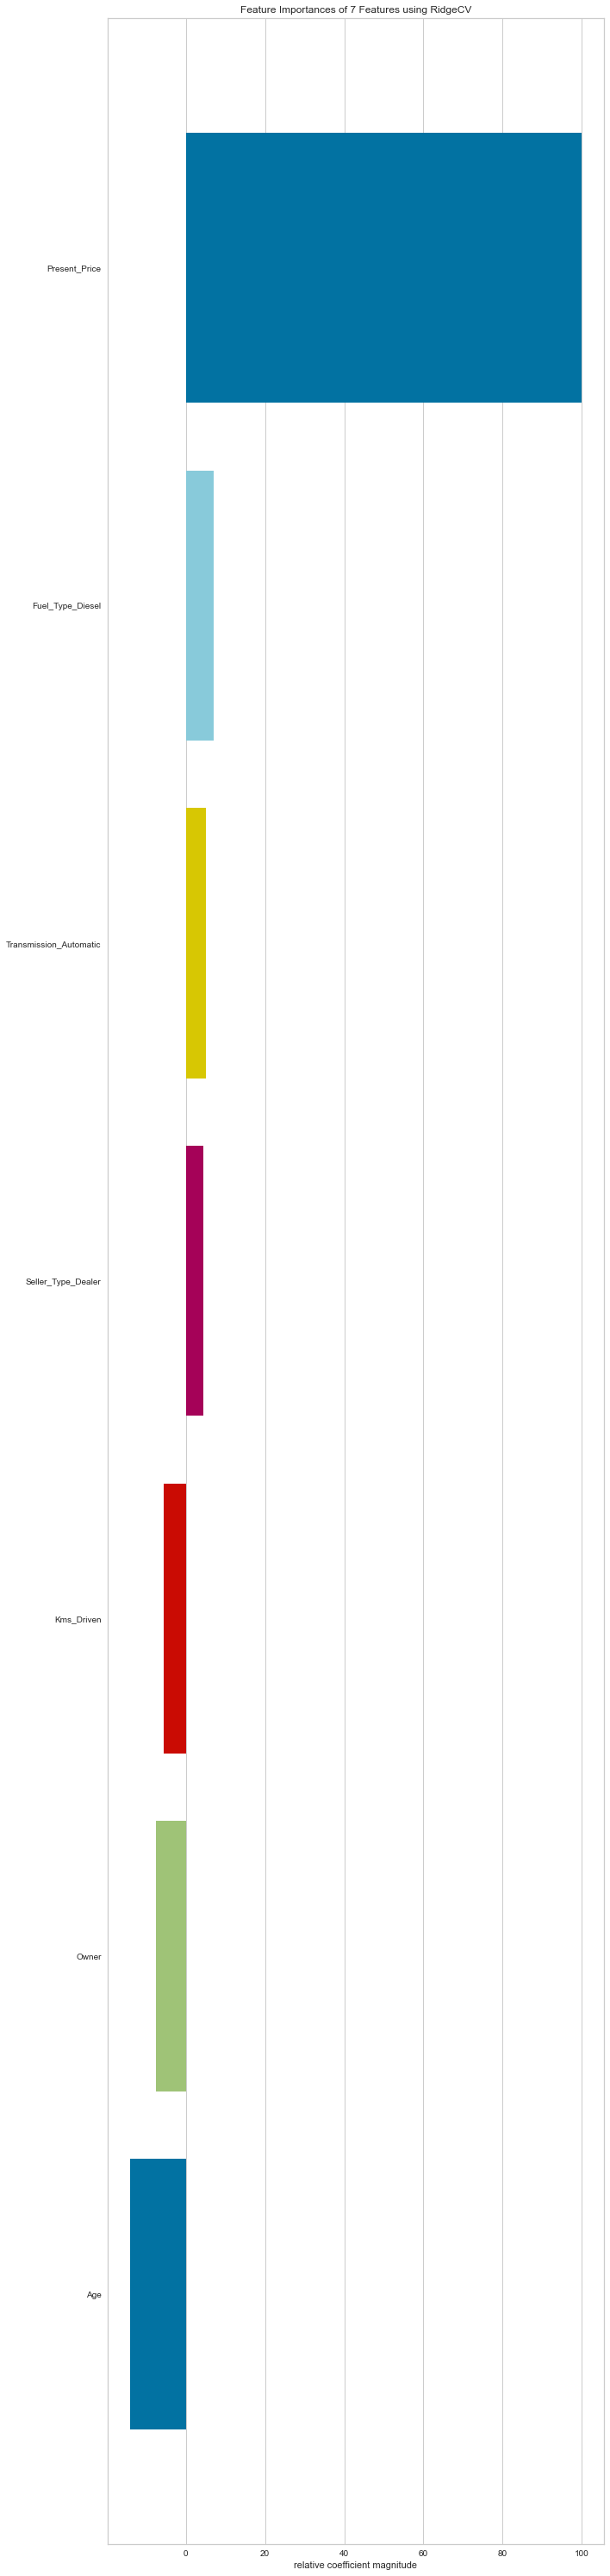

<AxesSubplot:title={'center':'Feature Importances of 7 Features using RidgeCV'}, xlabel='relative coefficient magnitude'>

In [213]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(ridge_cv_model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train, y_train)
viz.show()

## Feature importances with Lasso

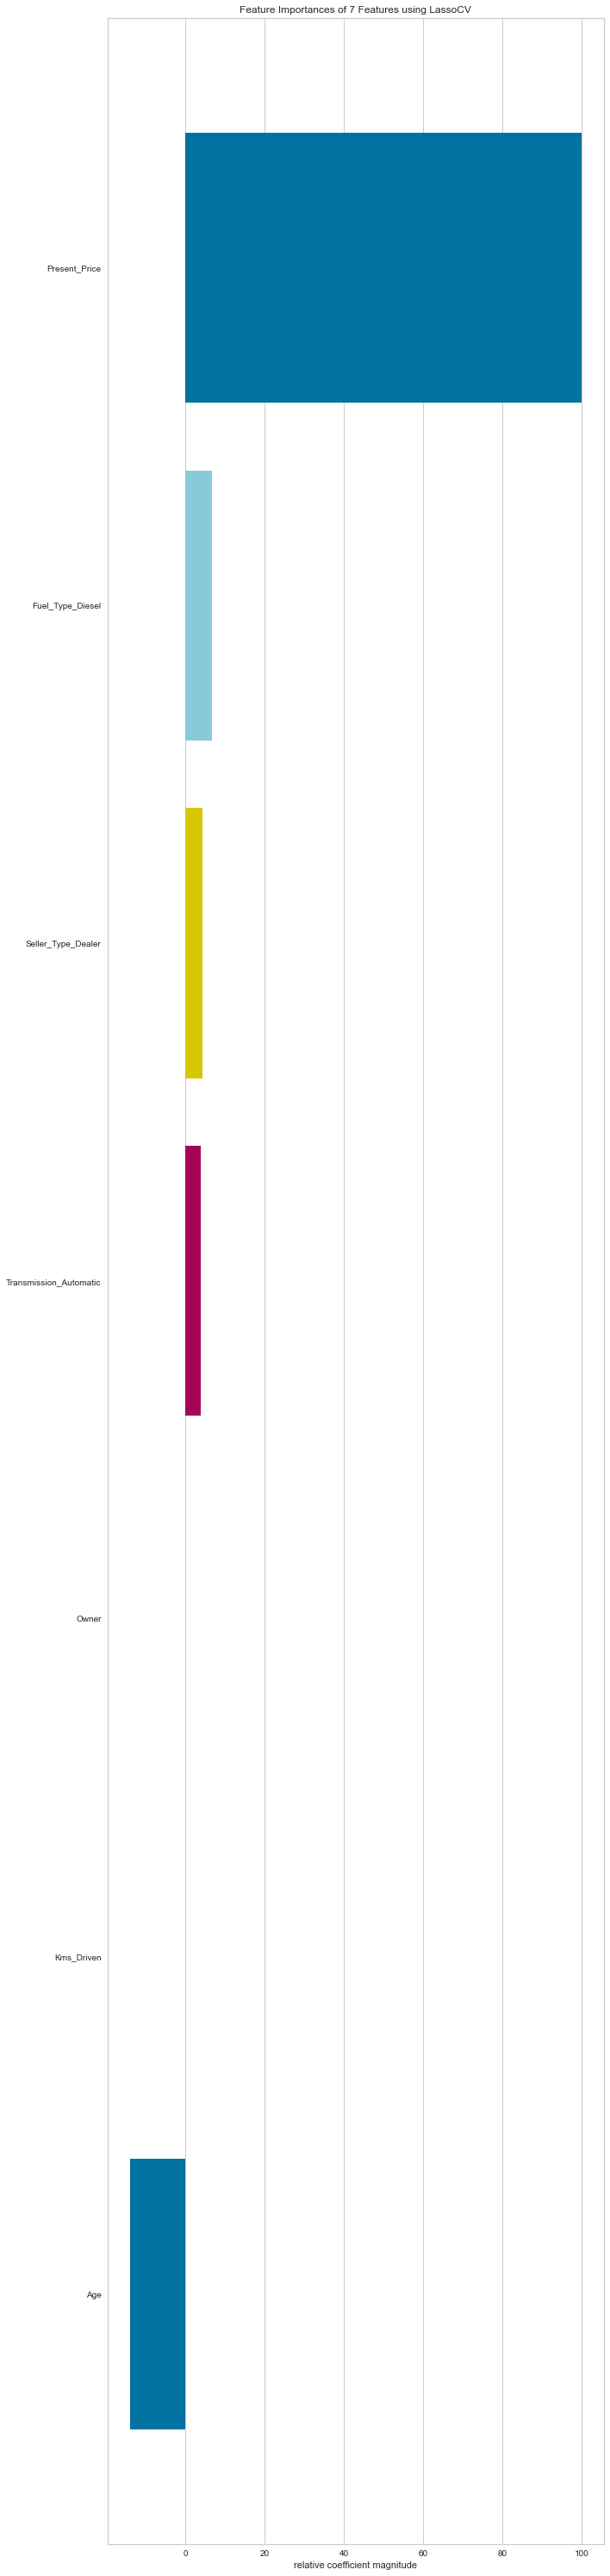

<AxesSubplot:title={'center':'Feature Importances of 7 Features using LassoCV'}, xlabel='relative coefficient magnitude'>

In [212]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(lasso_cv_model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train, y_train)
viz.show()